C:\Users\BALAJI\AppData\Local\Temp\ipykernel_8960\854560792.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


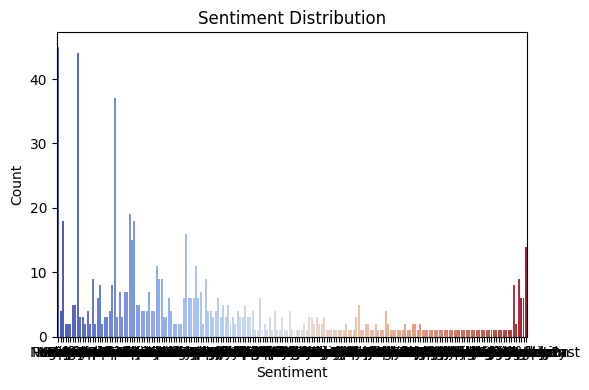

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_8960\854560792.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', palette='Set2')


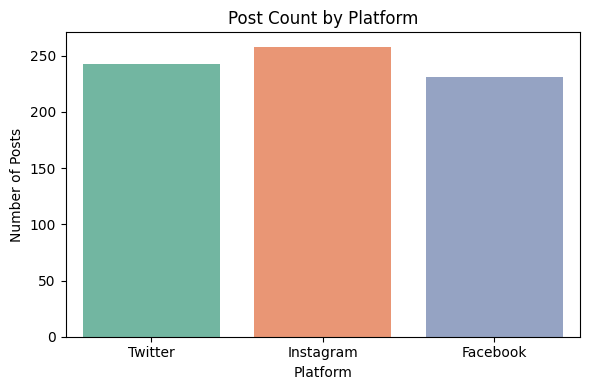

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_8960\854560792.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


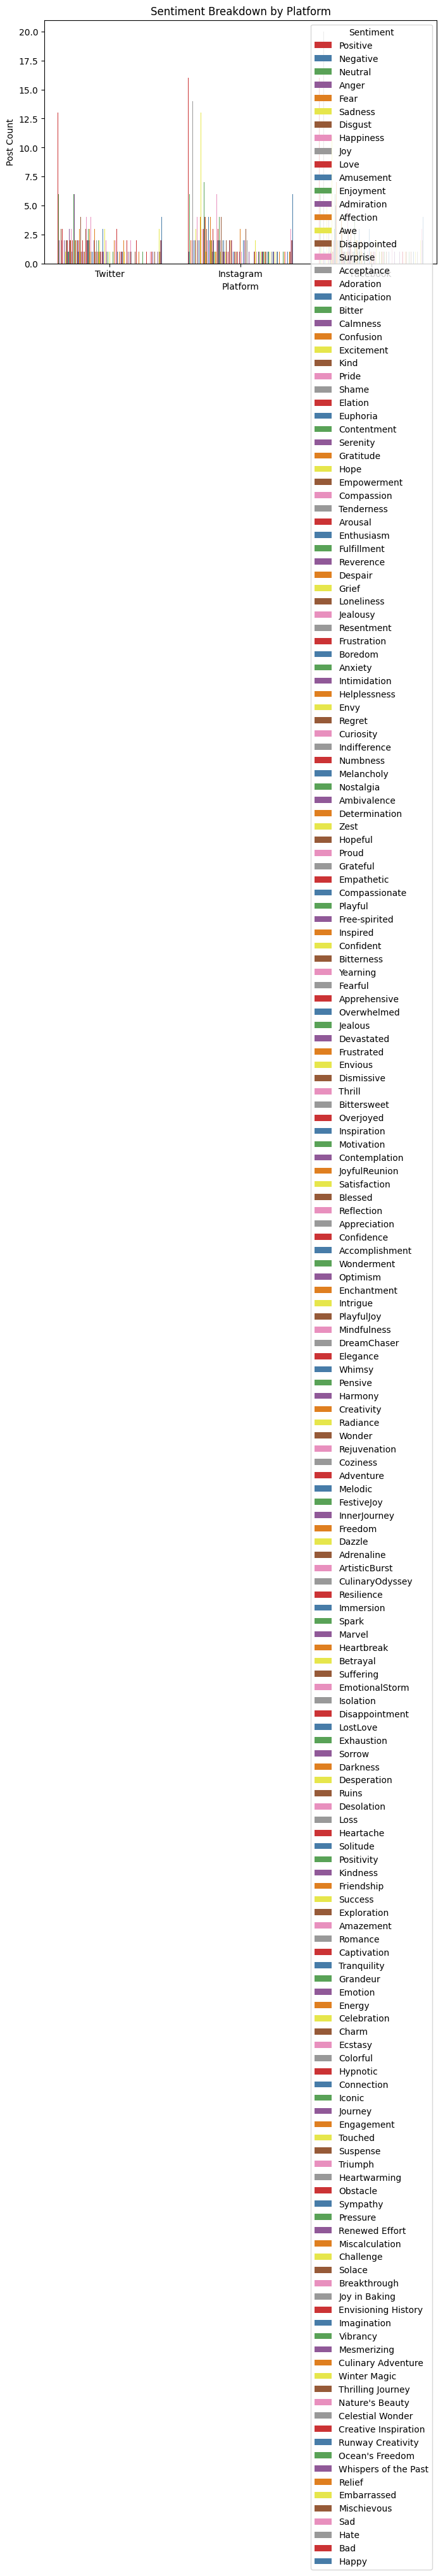

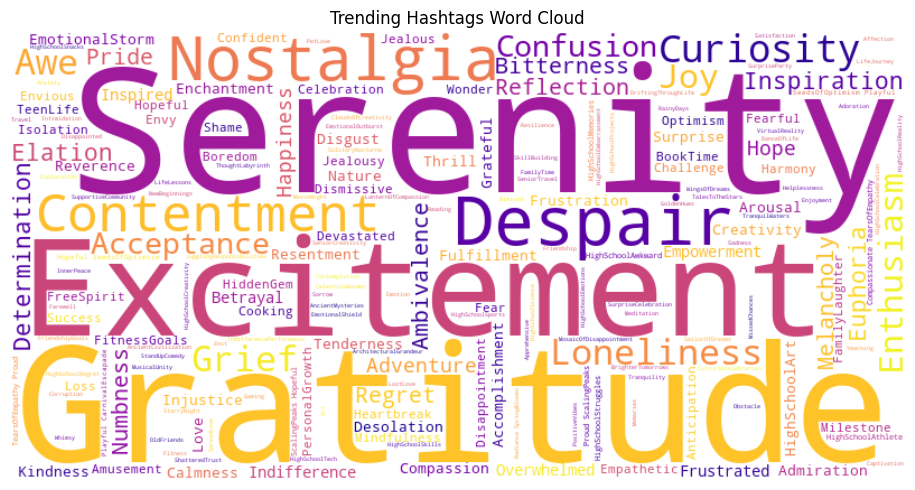

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_8960\854560792.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='flare')


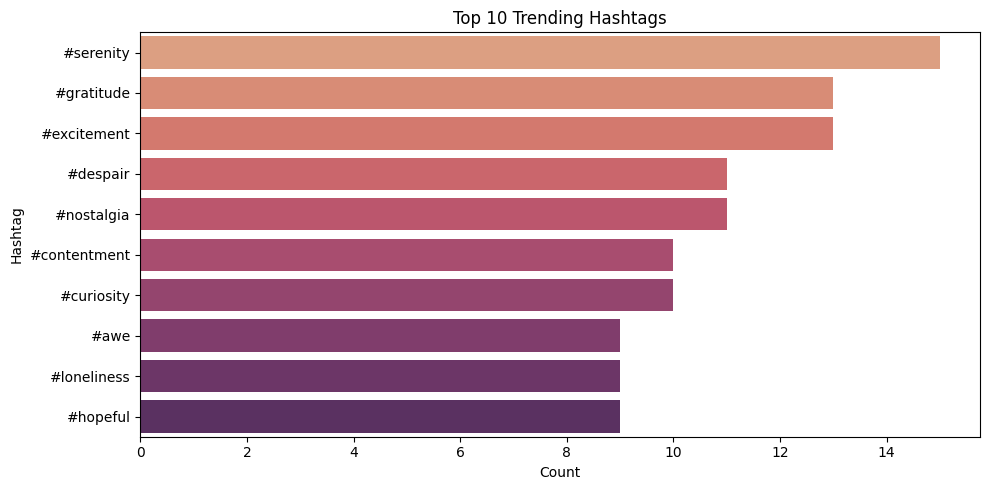

Top 10 Posts by Likes:
                                                  Text  Likes   Platform
540  Celebrating a historic victory in the World Cu...   80.0  Instagram
432  Heartache deepens, a solitary journey through ...   80.0  Instagram
402  Awe-inspired by the vastness of the cosmos on ...   80.0  Instagram
355  Anticipation for an upcoming adventure in an e...   80.0    Twitter
345  Motivated to achieve fitness goals after an in...   80.0   Facebook
382  A sense of wonder at the vastness of the cosmo...   80.0  Instagram
510  At the front row of Adele's concert, each note...   80.0  Instagram
570  Underneath the city lights, the dancer express...   80.0    Twitter
530  Captivated by the spellbinding plot twists, th...   80.0    Twitter
520  At a Justin Bieber concert, the infectious bea...   80.0  Instagram
Top 10 Posts by Retweets:
                                                  Text  Retweets   Platform
570  Underneath the city lights, the dancer express...      40.0    Twit

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_8960\854560792.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


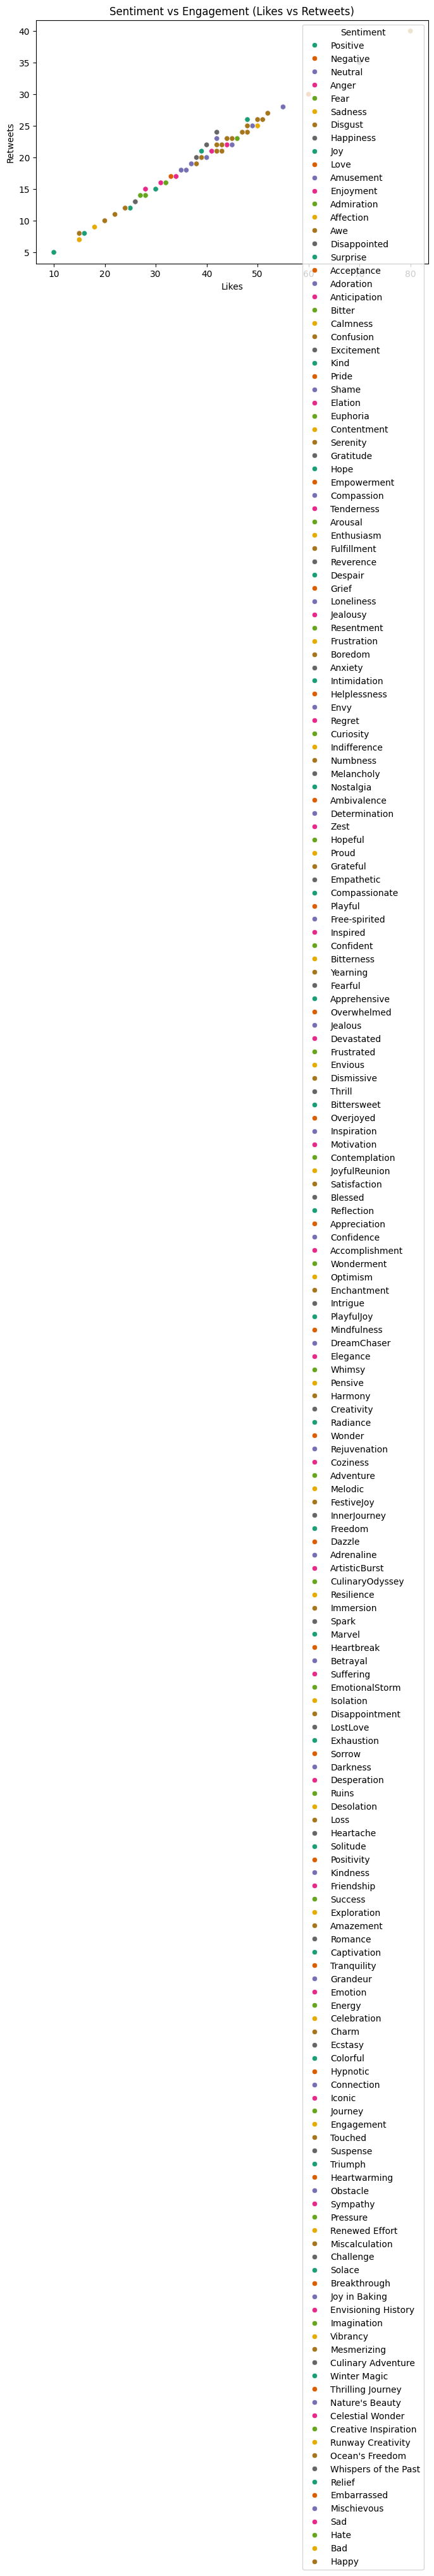

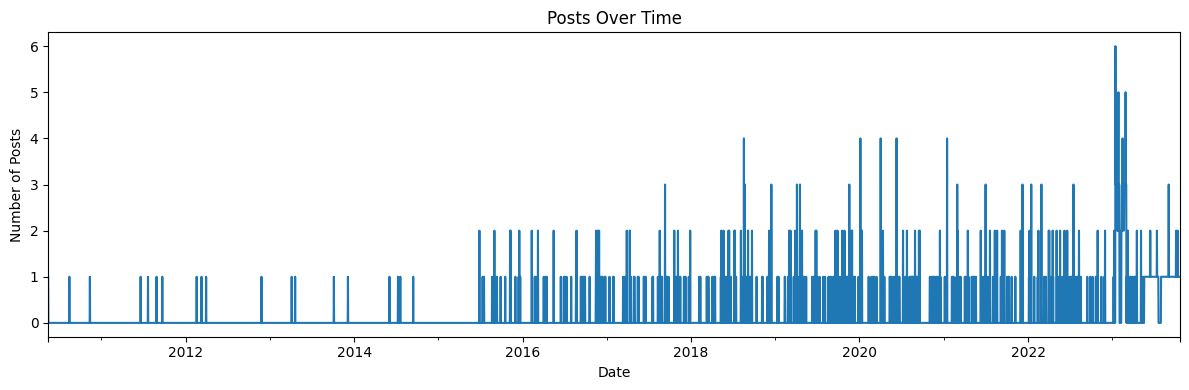

In [8]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Step 2: Load Data
df = pd.read_csv("E:/FutureInterns/FUTURE_DS_01/sentimentdataset.csv")

# Step 3: Clean Columns
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip()

# Optional: Parse timestamp if available
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Step 4: Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Step 5: Post Count Per Platform
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Platform', palette='Set2')
plt.title('Post Count by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

# Step 6: Sentiment by Platform
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette='Set1')
plt.title('Sentiment Breakdown by Platform')
plt.xlabel('Platform')
plt.ylabel('Post Count')
plt.tight_layout()
plt.show()

# Step 7: Hashtag Word Cloud
all_hashtags = ' '.join(df['Hashtags'].astype(str).tolist())
all_hashtags_cleaned = re.sub(r'[^#\w\s]', '', all_hashtags)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_hashtags_cleaned)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Hashtags Word Cloud')
plt.tight_layout()
plt.show()

# Step 8: Top 10 Hashtags by Frequency
hashtag_series = pd.Series(all_hashtags_cleaned.lower().split())
top_hashtags = hashtag_series.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='flare')
plt.title('Top 10 Trending Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

# Step 9: Top 10 Posts by Likes
if 'Likes' in df.columns:
    top_likes = df.sort_values(by='Likes', ascending=False).head(10)
    print("Top 10 Posts by Likes:")
    print(top_likes[['Text', 'Likes', 'Platform']])

# Step 10: Top 10 Posts by Retweets
if 'Retweets' in df.columns:
    top_retweets = df.sort_values(by='Retweets', ascending=False).head(10)
    print("Top 10 Posts by Retweets:")
    print(top_retweets[['Text', 'Retweets', 'Platform']])

# Step 11: Sentiment vs Engagement Scatter Plot
if 'Likes' in df.columns and 'Retweets' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Likes', y='Retweets', hue='Sentiment', palette='Dark2')
    plt.title('Sentiment vs Engagement (Likes vs Retweets)')
    plt.xlabel('Likes')
    plt.ylabel('Retweets')
    plt.tight_layout()
    plt.show()

# Step 12: Posts Over Time (if timestamp exists)
if 'Timestamp' in df.columns:
    posts_over_time = df.set_index('Timestamp').resample('D').size()
    plt.figure(figsize=(12, 4))
    posts_over_time.plot()
    plt.title('Posts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.tight_layout()
    plt.show()
